<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/ejercicio_2_taller_parcial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving natalidad.csv to natalidad.csv


In [2]:
import io
import pandas as pd
bites = io.BytesIO(uploaded['natalidad.csv'])
tabla_nac_med = pd.read_csv(bites, sep = ";", index_col=0, encoding='latin-1')
tabla_nac_med.head(4)

<ipython-input-2-cf5b11d10651>:4: DtypeWarning: Columns (4,14,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla_nac_med = pd.read_csv(bites, sep = ";", index_col=0, encoding='latin-1')


,areanac,cod_insp,sit_parto,otro_sit,nom_inst,cod_inst,sexo,peso_nac,talla_nac,fecha_nac,...,n_emb,seg_social,idclasadmi,nomclasad,codclasad,edad_padre,niv_edup,ultcurpad,barrio_res,comuna_res
id,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,1,NaN,PROMOTORA MEDICA LAS AMERICAS S.A,5.001021e+10,2,1070,38,23/04/2012,...,4,1,1.0,COOMEVA E.P.S. S.A.,EPS016,42,4,11,El RincÃ³n,16 Belen
2,1,NaN,1,NaN,CLINICA DEL PRADO S.A.,5.001046e+10,2,2900,47,30/05/2012,...,1,1,1.0,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,EPS002,25,99,9,Versalles N.2,03 Manrique
3,1,NaN,1,NaN,CLINICA UNIVERSITARIA BOLIVARIANA,5.001034e+10,2,2510,48,04/06/2012,...,2,5,NaN,NaN,NaN,34,8,3,Santa MÃ³nica,12 La America
4,1,NaN,1,NaN,UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...,5.001022e+10,1,3400,50,25/09/2012,...,1,5,NaN,NaN,NaN,24,99,9,Enciso,08 Villa Hermosa


In [3]:
tabla_nac_med.columns

Index(['areanac', 'cod_insp', 'sit_parto', 'otro_sit', 'nom_inst', 'cod_inst',
       'sexo', 'peso_nac', 'talla_nac', 'fecha_nac', 'ano', 'mes', 'aten_par',
       'otrparatx', 't_ges', 'numconsul', 'tipo_parto', 'mul_parto',
       'idhemoclas', 'idfactorrh', 'idpertet', 'nom_pueb', 'edad_madre',
       'est_civm', 'niv_edum', 'codptore', 'codmunre', 'cod_barrires',
       'n_hijosv', 'fecha_nacm', 'n_emb', 'seg_social', 'idclasadmi',
       'nomclasad', 'codclasad', 'edad_padre', 'niv_edup', 'ultcurpad',
       'barrio_res', 'comuna_res'],
      dtype='object')

In [4]:
tabla_regresion = tabla_nac_med[["peso_nac", "t_ges", "n_emb", 'n_hijosv', "edad_madre", "edad_padre"]]
tabla_regresion.head(3)

,peso_nac,t_ges,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,,
1,1070,30,4,3,39,42
2,2900,40,1,1,21,25
3,2510,36,2,2,37,34


In [5]:
tabla_regresion1 = tabla_regresion[(tabla_regresion["peso_nac"] < 6000) & (tabla_regresion["t_ges"] < 60) & (tabla_regresion["n_emb"] < 30) & (tabla_regresion["n_hijosv"] < 30) &
                                   (tabla_regresion["edad_padre"] < 60) & (tabla_regresion["edad_padre"] < 61)]

In [8]:
tabla_regresion1["t_ges"] # No es ni pandas ni tipo numpy

id
1         30
2         40
3         36
4         41
5         39
          ..
196725    40
196726    36
196727    36
196728    39
196729    39
Name: t_ges, Length: 190220, dtype: int64

In [10]:
import numpy as np
np.array(tabla_regresion1["t_ges"]) # El elemento que tenía una sola columna lo tuve que convertir a un elemento numpy

array([30, 40, 36, ..., 36, 39, 39])

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(np.array(tabla_regresion1["t_ges"]).reshape(-1, 1), np.array(tabla_regresion1["peso_nac"]).reshape(-1, 1))
pred_lineal = regresion.predict(np.array(tabla_regresion1["t_ges"]).reshape(-1, 1))
pred_lineal

array([[1573.27417294],
       [3368.81982688],
       [2650.6015653 ],
       ...,
       [2650.6015653 ],
       [3189.26526148],
       [3189.26526148]])

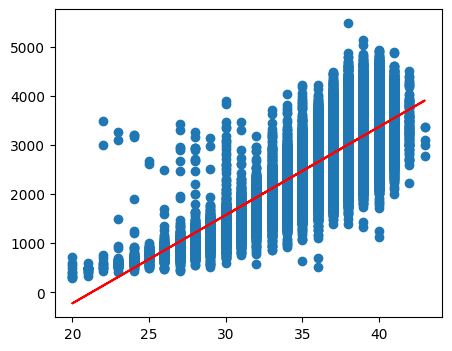

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["t_ges"], tabla_regresion1["peso_nac"])
plt.plot(tabla_regresion1["t_ges"], pred_lineal, linestyle='-', color = "red")
plt.show()

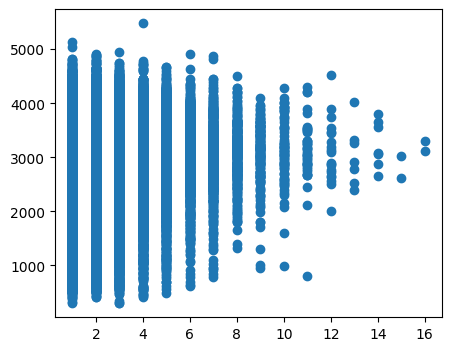

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["n_emb"], tabla_regresion1["peso_nac"])
plt.show()

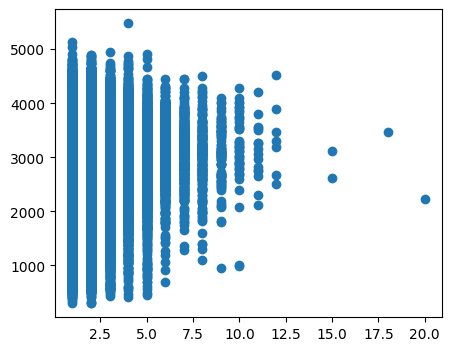

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["n_hijosv"], tabla_regresion1["peso_nac"])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np
regresion_madre = modelo_lineal.fit(np.array(tabla_regresion1["edad_madre"]).reshape(-1, 1), np.array(tabla_regresion1["peso_nac"]).reshape(-1, 1))
pred_madre = regresion_madre.predict(np.array(tabla_regresion1["edad_madre"]).reshape(-1, 1))
pred_madre

array([[3095.79010075],
       [3045.37404347],
       [3090.18831661],
       ...,
       [3067.78118004],
       [3053.77671968],
       [3042.5731514 ]])

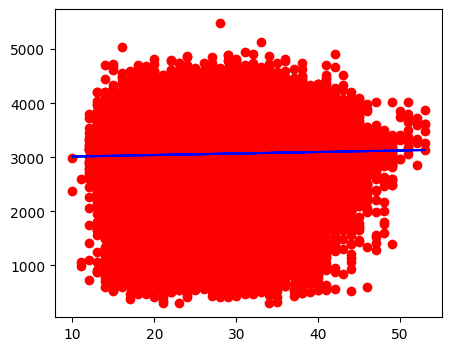

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["edad_madre"], tabla_regresion1["peso_nac"], c = "red")
plt.plot(tabla_regresion1["edad_madre"], pred_madre, linestyle='-', color = "blue")
plt.show()

In [17]:
from scipy.stats import spearmanr, kendalltau
pearson_corr = np.corrcoef(tabla_regresion1["edad_madre"], tabla_regresion1["peso_nac"])[0, 1]
pearman_corr, _ = spearmanr(tabla_regresion1["edad_madre"], tabla_regresion1["peso_nac"])
kendall_corr, _ = kendalltau(tabla_regresion1["edad_madre"], tabla_regresion1["peso_nac"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.03655814042677146, 0.054268391469789 y 0.037260528662105954.


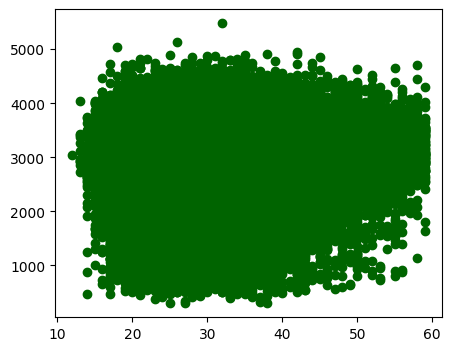

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["edad_padre"], tabla_regresion1["peso_nac"], c = "darkgreen")
plt.show()

In [19]:
X = tabla_regresion1.drop(columns = ["peso_nac"])
Y = tabla_regresion1[["peso_nac"]]

In [20]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=0)
testY.head(1)

,peso_nac
id,
73470,2030


In [112]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100, 100, 100, 100, 100, 100),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam', learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                 100),
             learning_rate='invscaling', max_iter=500)

In [113]:
y_pred = mlp_reg.predict(testX)
y_pred

array([2523.47241257, 3123.78213289, 3109.52748327, ..., 2790.90739169,
       3399.7250209 , 3115.32466996])

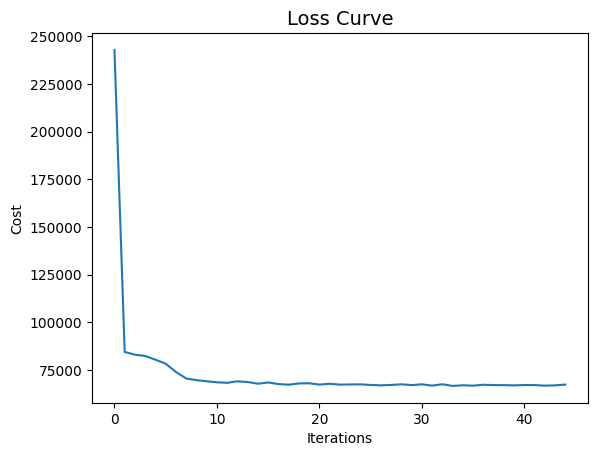

In [114]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [24]:
modelo_reg_multi = LinearRegression()
modelo_reg_multi.fit(trainX, trainY) # Estimación de parámetros para los datos de entrenamiento
y_pred_lin = modelo_reg_multi.predict(testX)
y_pred_lin

array([[2458.7571396 ],
       [3062.4190679 ],
       [3131.61455238],
       ...,
       [2643.84096605],
       [3432.74686604],
       [3132.99226467]])

In [25]:
y_pred_lin.flatten()

array([2458.7571396 , 3062.4190679 , 3131.61455238, ..., 2643.84096605,
       3432.74686604, 3132.99226467])

In [26]:
np.array(testY).flatten()

array([2030, 2550, 3100, ..., 2570, 3100, 3152])

In [27]:
tabla_pred_modelos = pd.DataFrame({"Datos": np.array(testY).flatten(), 'Red multicapa': y_pred, "Regresión": y_pred_lin.flatten()})
tabla_pred_modelos.head(4)

,Datos,Red multicapa,Regresión
0,2030,2415.697575,2458.757140
1,2550,3126.160386,3062.419068
2,3100,3129.549181,3131.614552
3,2890,3311.838489,3350.979907


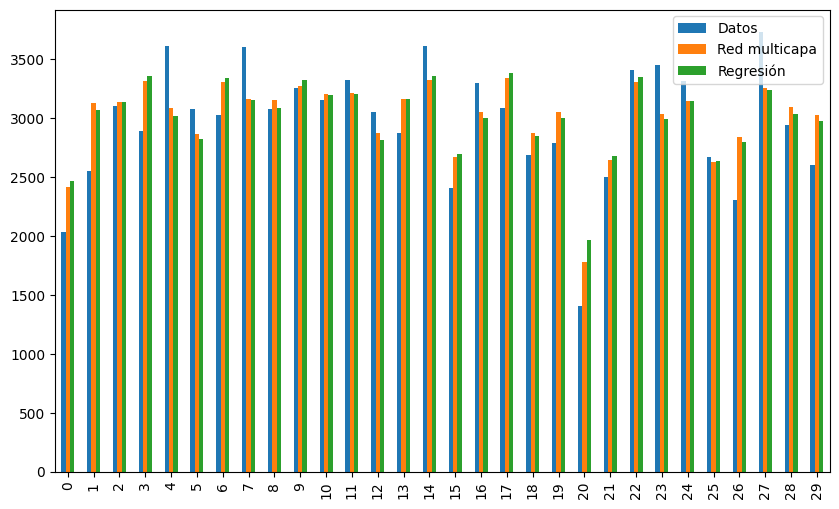

In [28]:
tabla_pred_30 = tabla_pred_modelos.head(30)
tabla_pred_30.plot(kind='bar',figsize=(10,6))
plt.show()

In [29]:
from sklearn import metrics
print('Error medio absoluto:', metrics.mean_absolute_error(testY, y_pred),
      'Error medio absoluto:', metrics.mean_absolute_error(testY, y_pred_lin))
print('Cuadrado medio del error:', metrics.mean_squared_error(testY, y_pred),
      'Cuadrado medio del error:', metrics.mean_squared_error(testY, y_pred_lin))

Error medio absoluto: 280.6134900722514 Error medio absoluto: 284.03234890232136
Cuadrado medio del error: 127414.02231982721 Cuadrado medio del error: 130379.92554603548


In [77]:
trainX.head(3)

,t_ges,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,
68262,40,1,1,19,28
73032,39,2,2,23,23
97974,38,2,2,29,36


In [85]:
from sklearn import linear_model
xy_train, z_train = trainX[["t_ges", "n_emb"]], trainY
xy_test, z_test = testX[["t_ges", "n_emb"]], testY
modelo1 = LinearRegression()
modelo1.fit(xy_train, z_train)

LinearRegression()

In [104]:
array = modelo1.coef_[0] # array([[180.04826663,  24.46013794], 5])
array[1]

array([-3876.86880049])

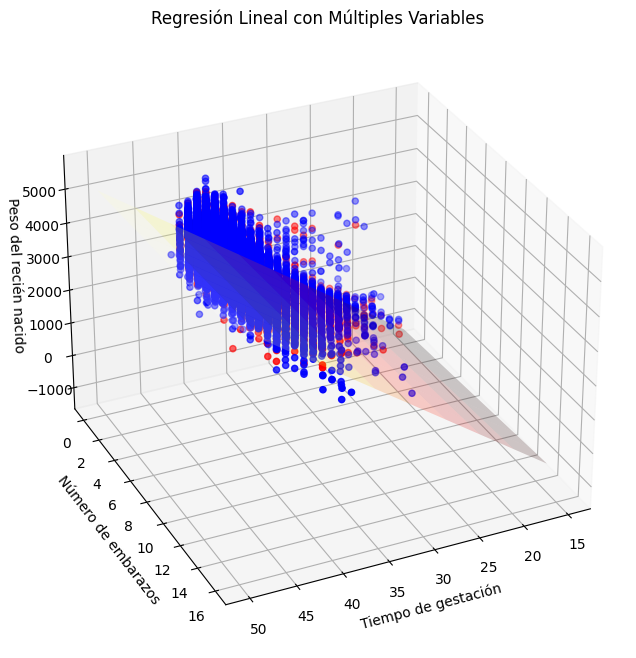

In [106]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(0, 15, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(xy_train["t_ges"], xy_train["n_emb"], z_train, c='blue',s=20)
ax.scatter(xy_test["t_ges"], xy_test["n_emb"], z_test, c='red',s=20)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Tiempo de gestación')
ax.set_ylabel('Número de embarazos')
ax.set_zlabel('Peso del recién nacido')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [115]:
r2_lineal = modelo_reg_multi.score(testX, testY)
r2_multicapa = mlp_reg.score(testX, testY)
print('El coeficiente de determinación bajo la red neuronal multicapa es de', r2_multicapa, ' y bajo el modelo de regresión lineal múltiple', r2_lineal)

El coeficiente de determinación bajo la red neuronal multicapa es de 0.4728738246368259  y bajo el modelo de regresión lineal múltiple 0.4666529448494051


In [76]:
no_obs = np.array([[25, 1, 1, 15, 18]])
print('Se espera que el recién nacido pese', mlp_reg.predict(no_obs), 'bajo el perceptrón multicapa y ', modelo_reg_multi.predict(no_obs), "bajo el modelo de regresión lineal múltiple.")

Se espera que el recién nacido pese [800.80452101] bajo el perceptrón multicapa y  [[605.41683608]] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
